#Modelos de IA Explicable Beñat


In [ ]:
pip install alibi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.5 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of thinc to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of thinc to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
INFO: pip is looking at multiple versions of spacy[lookups] to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.1/522.1 kB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 113.0 MB/s eta 0:00:0

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from alibi.explainers import ALE, plot_ale

En primer lugar, se preparan los conjuntos de entrenamiento y test para poder aplicar los distintos modelos

In [ ]:
# Split features and labels
df_train = pd.read_csv("data_train.csv")
df_test = pd.read_csv("data_test.csv")
feature_names = df_train.drop(columns=['winner']).columns
X_train = df_train.drop(columns=['winner']).values
y_train = df_train['winner'].values.astype(np.float32)

X_test = df_test.drop(columns=['winner']).values
y_test = df_test['winner'].values.astype(np.float32)


# Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

A continuación, se vuelve a entrenar la mejor configuración obtenida en MLP por Beñat.

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation = 'relu', solver = 'adam', alpha = 0.001, learning_rate_init = 0.05, max_iter = 50, random_state = 42, verbose=True)
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.71010952
Iteration 2, loss = 0.62651766
Iteration 3, loss = 0.60917241
Iteration 4, loss = 0.60913757
Iteration 5, loss = 0.62508072
Iteration 6, loss = 0.61764269
Iteration 7, loss = 0.61821780
Iteration 8, loss = 0.62270789
Iteration 9, loss = 0.61925349
Iteration 10, loss = 0.61797066
Iteration 11, loss = 0.61813759
Iteration 12, loss = 0.61903500
Iteration 13, loss = 0.61809520
Iteration 14, loss = 0.61767137
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(alpha=0.001, hidden_layer_sizes=(100, 50),
              learning_rate_init=0.05, max_iter=50, random_state=42,
              verbose=True)

In [ ]:
# Elegimos una instancia aleatoria del conjunto de test
instancia_idx = 18663
instancia = X_test[instancia_idx:instancia_idx+1]

# Predicción del modelo
prediccion = mlp.predict(instancia)[0]
probabilidad_predicha = mlp.predict_proba(instancia)[0][1]

# Valor real
valor_real = y_test[instancia_idx]

print("Instancia elegida:", instancia_idx)
print("Predicción del modelo (ganador):", prediccion)
print("Probabilidad predicha:", probabilidad_predicha)
print("Valor real en el dataset:", valor_real)

Instancia elegida: 18663
Predicción del modelo (ganador): 0.0
Probabilidad predicha: 0.46535460664948647
Valor real en el dataset: 0.0


Se ha elegido la instancia 18663 del dataset, que corresponde con la final del Masters 1000 de Monte Carlo en 2012 entre Rafa Nadal y Novak Djokovic para aplicar el modelo de IA explicable SHAP. Para obtener un análisis más global, se aplicará el modelo ALE también.

#Primer modelo de IA Explicable: SHAP

In [ ]:
explainer_mlp = shap.Explainer(mlp.predict, X_train, feature_names=feature_names)
shap_values_mlp = explainer_mlp(instancia)

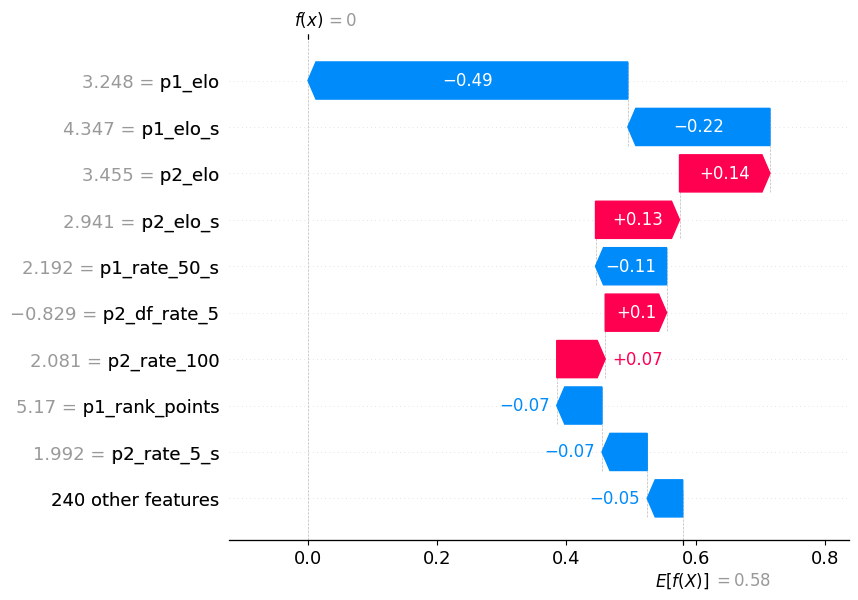

In [ ]:
shap.plots.waterfall(shap_values_mlp[0])

#Segundo modelo de IA Explicable: ALE

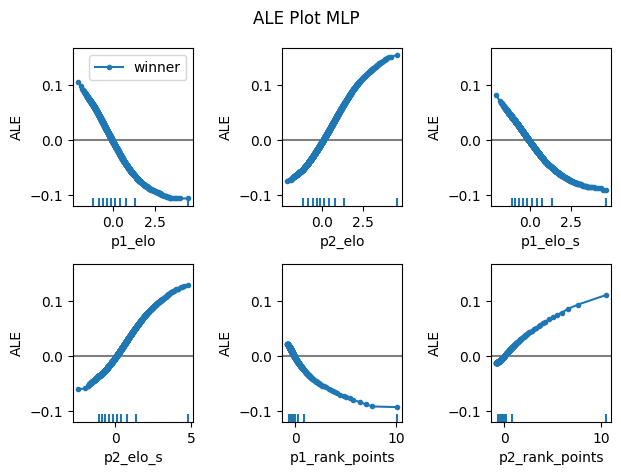

In [ ]:
# Nombres de las características y del objetivo
target_names = ["winner"]

predict_class_1 = lambda X: mlp.predict_proba(X)[:, 1]

# Crear explicador ALE
ale_mlp = ALE(feature_names=feature_names, target_names=target_names, predictor=predict_class_1)


# Ejecutar explicación solo para las dos primeras características (en este caso colesterol y presion arterial)
exp_mlp = ale_mlp.explain(X_test, features=[8, 9, 10, 11, 6, 7])

# Visualizar resultado
axes = plot_ale(exp_mlp)
plt.suptitle("ALE Plot MLP")
plt.tight_layout()
plt.show()